# 第3部 機械学習向けの加工と特殊なデータ加工

## 第7章 機械学習の前処理を行う10本ノック

### ノック81 : 機械学習で予測するデータを設定しよう

#### タイタニック号の生存状況データの読み込み

In [12]:
import seaborn as sns

dataset = sns.load_dataset('titanic')
dataset

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


#### 目的変数（生存状況）の読み込み

In [13]:
label = dataset.pop('survived')
label

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

### ノック82 : TrainデータとTestデータに分割しよう

#### データの分割

In [14]:
from sklearn.model_selection import train_test_split

train_ds, test_ds, train_label, test_label = train_test_split(dataset, label, random_state=2021, stratify=label)

display(train_ds)
display(test_ds)
display(train_label)
display(test_label)

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
293,3,female,24.0,0,0,8.8500,S,Third,woman,False,NaN,Southampton,no,True
201,3,male,NaN,8,2,69.5500,S,Third,man,True,NaN,Southampton,no,False
322,2,female,30.0,0,0,12.3500,Q,Second,woman,False,NaN,Queenstown,yes,True
266,3,male,16.0,4,1,39.6875,S,Third,man,True,NaN,Southampton,no,False
540,1,female,36.0,0,2,71.0000,S,First,woman,False,B,Southampton,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,1,female,32.0,0,0,76.2917,C,First,woman,False,D,Cherbourg,yes,True
800,2,male,34.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
68,3,female,17.0,4,2,7.9250,S,Third,woman,False,NaN,Southampton,yes,False
92,1,male,46.0,1,0,61.1750,S,First,man,True,E,Southampton,no,False


,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
404,3,female,20.0,0,0,8.6625,S,Third,woman,False,NaN,Southampton,no,True
521,3,male,22.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
130,3,male,33.0,0,0,7.8958,C,Third,man,True,NaN,Cherbourg,no,True
14,3,female,14.0,0,0,7.8542,S,Third,child,False,NaN,Southampton,no,True
610,3,female,39.0,1,5,31.2750,S,Third,woman,False,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
833,3,male,23.0,0,0,7.8542,S,Third,man,True,NaN,Southampton,no,True
238,2,male,19.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
824,3,male,2.0,4,1,39.6875,S,Third,child,False,NaN,Southampton,no,False
486,1,female,35.0,1,0,90.0000,S,First,woman,False,C,Southampton,yes,False


293    0
201    0
322    1
266    0
540    1
      ..
218    1
800    0
68     1
92     0
480    0
Name: survived, Length: 668, dtype: int64

404    0
521    0
130    0
14     0
610    0
      ..
833    0
238    0
824    0
486    1
879    1
Name: survived, Length: 223, dtype: int64

### ノック83 : データを機械学習に適した形式へ変換しよう

#### 不要なデータの削除

In [15]:
train_ds.drop(columns=['embark_town', 'alive'], inplace=True)
train_ds.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,alone
293,3,female,24.0,0,0,8.8500,S,Third,woman,False,NaN,True
201,3,male,NaN,8,2,69.5500,S,Third,man,True,NaN,False
322,2,female,30.0,0,0,12.3500,Q,Second,woman,False,NaN,True
266,3,male,16.0,4,1,39.6875,S,Third,man,True,NaN,False
540,1,female,36.0,0,2,71.0000,S,First,woman,False,B,False


#### one-hot エンコーディングでデータ形式を整形

In [16]:
import pandas as pd

one_hot_encoded = pd.get_dummies(train_ds)
one_hot_encoded.head()

,pclass,age,sibsp,parch,fare,adult_male,alone,sex_female,sex_male,embarked_C,...,who_child,who_man,who_woman,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G
293,3,24.0,0,0,8.8500,False,True,1,0,0,...,0,0,1,0,0,0,0,0,0,0
201,3,NaN,8,2,69.5500,True,False,0,1,0,...,0,1,0,0,0,0,0,0,0,0
322,2,30.0,0,0,12.3500,False,True,1,0,0,...,0,0,1,0,0,0,0,0,0,0
266,3,16.0,4,1,39.6875,True,False,0,1,0,...,0,1,0,0,0,0,0,0,0,0
540,1,36.0,0,2,71.0000,False,False,1,0,0,...,0,0,1,0,1,0,0,0,0,0


#### label エンコーディング

In [17]:
from sklearn .preprocessing import LabelEncoder

label_encoded = train_ds.copy()
class_encoded = LabelEncoder()

label_encoded['class'] = class_encoded.fit_transform(label_encoded['class'])

label_encoded.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,alone
293,3,female,24.0,0,0,8.8500,S,2,woman,False,NaN,True
201,3,male,NaN,8,2,69.5500,S,2,man,True,NaN,False
322,2,female,30.0,0,0,12.3500,Q,1,woman,False,NaN,True
266,3,male,16.0,4,1,39.6875,S,2,man,True,NaN,False
540,1,female,36.0,0,2,71.0000,S,0,woman,False,B,False


#### pclass 列の変換

In [18]:
one_hot_encoded = pd.get_dummies(one_hot_encoded, columns=['pclass'])
one_hot_encoded.head()

,age,sibsp,parch,fare,adult_male,alone,sex_female,sex_male,embarked_C,embarked_Q,...,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,pclass_1,pclass_2,pclass_3
293,24.0,0,0,8.8500,False,True,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
201,NaN,8,2,69.5500,True,False,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
322,30.0,0,0,12.3500,False,True,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
266,16.0,4,1,39.6875,True,False,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
540,36.0,0,2,71.0000,False,False,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0


#### True / False の数値変換

In [19]:
one_hot_encoded = one_hot_encoded.replace({True: 1, False: 0})
one_hot_encoded.head()

,age,sibsp,parch,fare,adult_male,alone,sex_female,sex_male,embarked_C,embarked_Q,...,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,pclass_1,pclass_2,pclass_3
293,24.0,0,0,8.8500,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
201,NaN,8,2,69.5500,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
322,30.0,0,0,12.3500,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
266,16.0,4,1,39.6875,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
540,36.0,0,2,71.0000,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [22]:
train_ds = one_hot_encoded
train_ds

,age,sibsp,parch,fare,adult_male,alone,sex_female,sex_male,embarked_C,embarked_Q,...,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,pclass_1,pclass_2,pclass_3
293,24.0,0,0,8.8500,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
201,NaN,8,2,69.5500,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
322,30.0,0,0,12.3500,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
266,16.0,4,1,39.6875,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
540,36.0,0,2,71.0000,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,32.0,0,0,76.2917,0,1,1,0,1,0,...,0,0,0,1,0,0,0,1,0,0
800,34.0,0,0,13.0000,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
68,17.0,4,2,7.9250,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
92,46.0,1,0,61.1750,1,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0


### ノック84 : 外れ値の検出をしよう

In [26]:
q = train_ds.quantile([1/4, 3/4])

q1, q3 = q.loc[1/4], q.loc[3/4]

iqr = q3 - q1

iqr

max = q3 + 1.5 * iqr
min = q1 - 1.5 * iqr

((train_ds > max) | (train_ds < min)).sum()

age               4
sibsp            40
parch           164
fare             88
adult_male        0
alone             0
sex_female        0
sex_male          0
embarked_C      127
embarked_Q       58
embarked_S        0
class_First     164
class_Second    133
class_Third       0
who_child        64
who_man           0
who_woman         0
deck_A           11
deck_B           33
deck_C           45
deck_D           27
deck_E           24
deck_F            9
deck_G            2
pclass_1        164
pclass_2        133
pclass_3          0
dtype: int64

### ノック85 : データの分布をみてスケーリング手法を考えよう

In [27]:
train_ds.describe()

,age,sibsp,parch,fare,adult_male,alone,sex_female,sex_male,embarked_C,embarked_Q,...,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,pclass_1,pclass_2,pclass_3
count,531.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.00000,668.000000,...,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,29.694124,0.546407,0.390719,32.485822,0.600299,0.601796,0.353293,0.646707,0.19012,0.086826,...,0.016467,0.049401,0.067365,0.040419,0.035928,0.013473,0.002994,0.245509,0.199102,0.555389
std,14.569037,1.153550,0.807594,49.198142,0.490204,0.489895,0.478351,0.478351,0.39269,0.281791,...,0.127358,0.216867,0.250841,0.197088,0.186250,0.115375,0.054677,0.430711,0.399624,0.497295
min,0.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.250000,0.000000,0.000000,7.925000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,28.000000,0.000000,0.000000,15.047900,1.000000,1.000000,0.000000,1.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,39.000000,1.000000,0.000000,31.000000,1.000000,1.000000,1.000000,1.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


(array([547.,  80.,  25.,   1.,   8.,   5.,   0.,   0.,   0.,   2.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

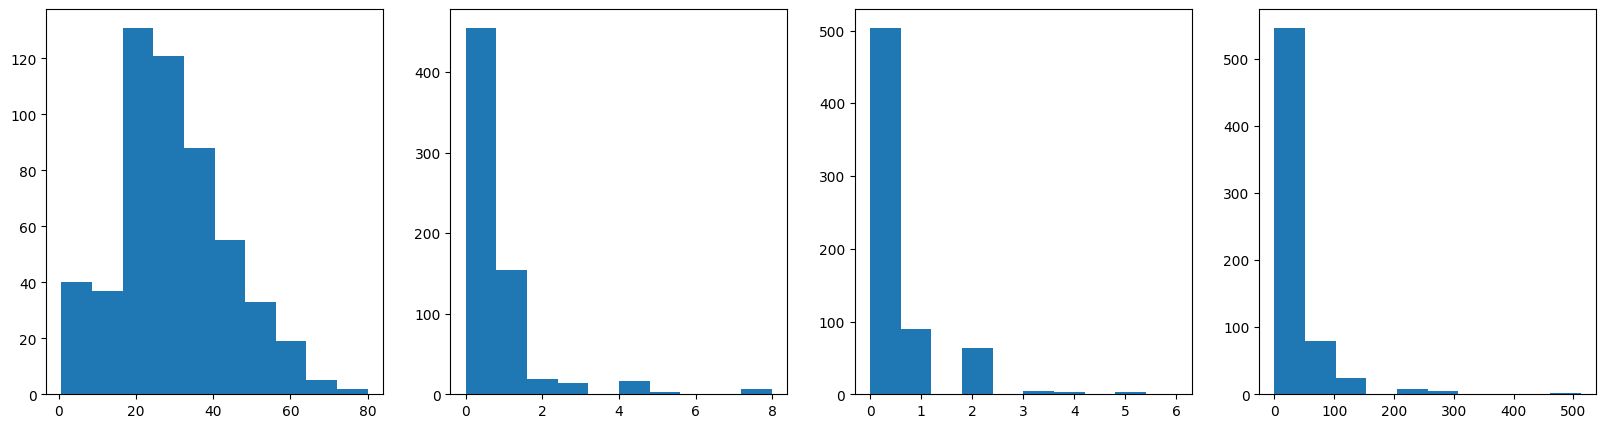

In [31]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(ncols=4, figsize=(20, 5))

axes[0].hist(train_ds.age)
axes[1].hist(train_ds.sibsp)
axes[2].hist(train_ds.parch)
axes[3].hist(train_ds.fare)